# Wine clustering with Random Forest 

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
data = pd.read_csv('../data/final_wine_and_fire_data.csv')

In [3]:
data.describe()

,Unnamed: 0,points,price,province_id,variety_numerical,vintage,lat,lon,total_fires,sum_fire_size,total_fires_current,sum_fire_size_current,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,norm_total_fires_current,norm_sum_fire_size_current
count,9757.000000,9757.00000,9757.000000,9757.0,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.00000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000
mean,4878.000000,89.97407,46.297018,7.0,360.879779,2012.819309,37.788765,-121.287975,148.603464,3404.554760,146.665983,3585.34697,0.010823,0.514074,0.020515,0.100748,0.331704,0.013330,0.327379,0.014038
std,2816.747622,2.73060,35.655901,0.0,203.704069,2.027649,1.682555,3.509534,79.944638,13670.226402,72.144221,13675.78481,0.001006,0.290177,0.017713,0.027582,0.178448,0.053523,0.161036,0.053544
min,0.000000,80.00000,5.000000,7.0,0.000000,1991.000000,32.963784,-123.899773,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2439.000000,88.00000,28.000000,7.0,125.000000,2012.000000,37.050096,-122.285529,115.000000,393.020000,120.000000,472.82000,0.010417,0.178063,0.011426,0.080808,0.256696,0.001539,0.267857,0.001851
50%,4878.000000,90.00000,40.000000,7.0,440.000000,2013.000000,38.293313,-122.048027,146.000000,1339.780000,136.000000,968.81000,0.010913,0.626781,0.017387,0.101010,0.325893,0.005246,0.303571,0.003793
75%,7317.000000,92.00000,55.000000,7.0,475.000000,2014.000000,38.707681,-121.489668,202.000000,1756.380000,196.000000,1453.08000,0.011409,0.676638,0.024839,0.121212,0.450893,0.006877,0.437500,0.005689
max,9756.000000,99.00000,2013.000000,7.0,702.000000,2016.000000,41.209752,-92.565963,448.000000,255410.400000,448.000000,255410.40000,0.012401,1.000000,0.997516,0.191919,1.000000,1.000000,1.000000,1.000000


In [4]:
names_col = [data.columns]
for i in range(len(names_col)):
    print names_col[i]

Index([u'Unnamed: 0', u'country', u'description', u'designation', u'points',
       u'price', u'province', u'region_1', u'region_2', u'taster_name',
       u'taster_twitter_handle', u'title', u'variety', u'winery',
       u'province_id', u'variety_numerical', u'vintage', u'lat', u'lon',
       u'total_fires', u'sum_fire_size', u'total_fires_current',
       u'sum_fire_size_current', u'norm_vintage', u'norm_variety_numerical',
       u'norm_price', u'norm_points', u'norm_total_fires',
       u'norm_sum_fire_size', u'norm_total_fires_current',
       u'norm_sum_fire_size_current'],
      dtype='object')


In [5]:
len(data.taster_twitter_handle.unique().sum())


75

In [6]:
ref_dict = {}
for i, x in enumerate(data.taster_twitter_handle.unique()):
    print x, i
    ref_dict.update({x: i})
data['taster_twitter_handle_id'] = data['taster_twitter_handle'].replace(to_replace=ref_dict,)

@vboone 0
@mattkettmann 1
@vossroger 2
@gordone_cellars 3
@JoeCz 4
@paulgwine  5
@wineschach 6


In [7]:
points = data.loc[:,'points']
points = np.array(points, dtype=pd.Series)
points = points.reshape(-1, 1)
cluster = KMeans(n_clusters = 3, random_state = 0).fit(points)
point_bins = cluster.labels_

data['point_bin'] = point_bins

(array([5.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 3.800e+01,
        0.000e+00, 0.000e+00, 7.100e+01, 0.000e+00, 1.550e+02, 0.000e+00,
        0.000e+00, 2.890e+02, 0.000e+00, 0.000e+00, 5.410e+02, 0.000e+00,
        7.540e+02, 0.000e+00, 0.000e+00, 1.204e+03, 0.000e+00, 0.000e+00,
        6.690e+02, 0.000e+00, 1.595e+03, 0.000e+00, 0.000e+00, 1.370e+03,
        0.000e+00, 0.000e+00, 1.200e+03, 0.000e+00, 1.024e+03, 0.000e+00,
        0.000e+00, 5.830e+02, 0.000e+00, 0.000e+00, 1.920e+02, 0.000e+00,
        4.000e+01, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00]),
 array([80.        , 80.37254902, 80.74509804, 81.11764706, 81.49019608,
        81.8627451 , 82.23529412, 82.60784314, 82.98039216, 83.35294118,
        83.7254902 , 84.09803922, 84.47058824, 84.84313725, 85.21568627,
        85.58823529, 85.96078431, 86.33333333, 86.70588235, 87.07843137,
        87.45098039, 87.82352941, 88.19607843, 88.56862745, 88.94117647,


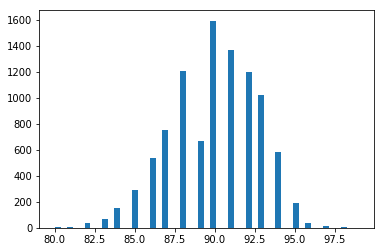

In [8]:
plt.hist(data['points'], bins='auto') 

In [9]:
X=data[['variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 'norm_sum_fire_size_current','lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 'norm_sum_fire_size']]  # Features
y=data['point_bin']  # Labels
x_name = (['variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 'norm_sum_fire_size_current', 'lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 'norm_sum_fire_size'])


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.537568306010929)


In [13]:
feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

norm_price                    0.451163
variety_numerical             0.194688
lat                           0.068643
lon                           0.066524
norm_sum_fire_size_current    0.041387
norm_total_fires              0.040512
norm_sum_fire_size            0.040287
norm_total_fires_current      0.039846
norm_vintage                  0.030546
taster_twitter_handle_id      0.026404
dtype: float64

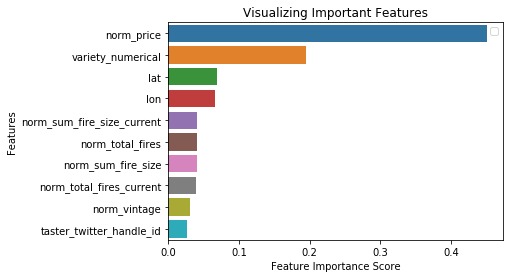

In [14]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
data['correlation_coeff'] = ((data.norm_price*.4568)**4 + (data.variety_numerical*.207)**3 + (data.lon*.0642)**2 + data.lat*.0622)

In [16]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['norm_price', 'variety_numerical','correlation_coeff']]  # Removed feature "sepal length"
y=data['point_bin']  
x_name = (['norm_price', 'variety_numerical','correlation_coeff'])
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.47774524158125914)


In [18]:
feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

norm_price           0.524504
correlation_coeff    0.373110
variety_numerical    0.102386
dtype: float64

In [19]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.4862371888726208)


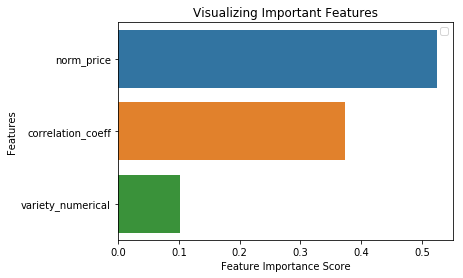

In [20]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

('Accuracy:', 0.504099560761347)
('Accuracy:', 0.5055636896046852)


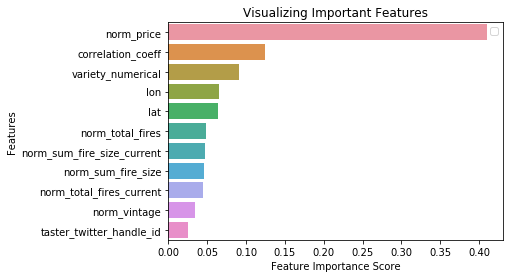

In [21]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['correlation_coeff', 'variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 
        'norm_sum_fire_size_current','lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 
        'norm_sum_fire_size']]  # Features
y=data['point_bin']  # Labels
x_name = (['correlation_coeff', 'variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 
           'norm_sum_fire_size_current', 'lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 
           'norm_sum_fire_size'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [22]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_mat, range(3), range(3))
conf_mat

array([[1244,  266,  597],
       [ 309, 1112,  703],
       [ 752,  750, 1097]])

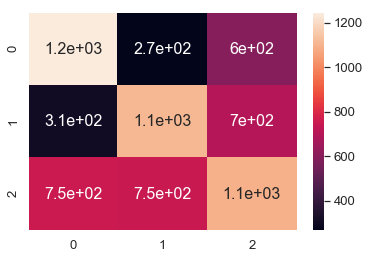

In [23]:
sns.set(font_scale=1.2)#for label size
sns.heatmap(conf_mat, annot=True,annot_kws={"size": 16})# font size


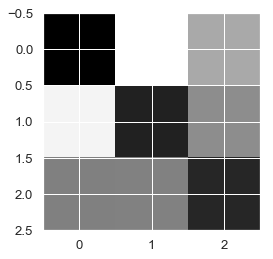

In [24]:
plt.imshow(conf_mat, cmap='binary')

In [25]:
data.to_csv('../data/final_wine_and_fire_tiwitter_id.csv')